In [1]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,_),(x_test,_) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape


(60000, 28, 28)

In [4]:
from re import X
nPixel =x_train.shape[1]*x_train.shape[2]
print(nPixel)

784


In [5]:
x_train = x_train.reshape(x_train.shape[0],nPixel).astype("float32")
x_test = x_test.reshape(x_test.shape[0],nPixel).astype("float32")

In [6]:
x_train = x_train/255
x_test = x_test/255

In [7]:
x_train.shape

(60000, 784)

In [8]:
x_test.shape

(10000, 784)

In [32]:
input_size = 784
hidden_size = 128
code_size = 16


In [33]:
input_img = Input(shape = (input_size,) )
hidden1 = Dense(hidden_size,activation='relu')(input_img)
code = Dense(code_size,activation ='relu')(hidden1)
hidden2 = Dense(hidden_size,activation='relu')(code)
output_img = Dense(input_size,activation='sigmoid')(hidden2)

Training


In [34]:
autoencoder = Model(input_img,output_img)


In [35]:
autoencoder.compile(optimizer = 'adam' , loss ='binary_crossentropy' )

In [36]:
autoencoder.fit(x_train,x_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1512
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1186
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1133
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1102
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1080


In [37]:
# Evaluate
decoded_img = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


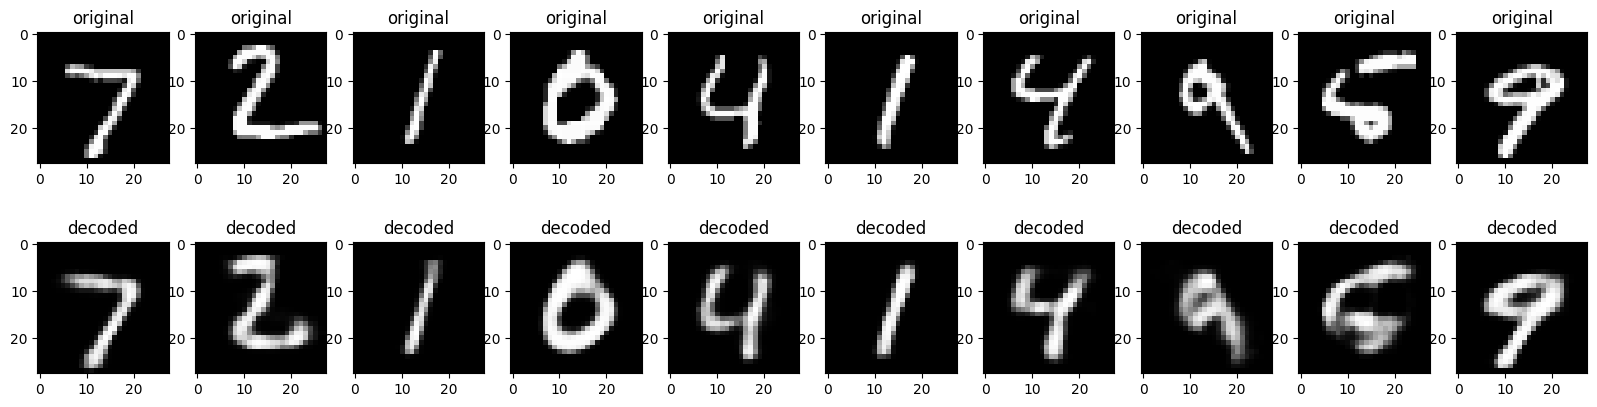

In [38]:
#plot it
n= 10
plt.figure(figsize=(20,5))
for i in range (n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.title("original")

  ax = plt.subplot(2,n,i+11)
  plt.imshow(decoded_img[i].reshape(28,28))
  plt.title("decoded")
  plt.gray()




Denoising Autoencoder

In [16]:
noise_fact = 0.4
x_train_noise = x_train + noise_fact * np.random.normal(size=x_train.shape)
x_test_noise = x_test + noise_fact * np.random.normal(size=x_test.shape)

In [17]:
x_train_noise = np.clip(x_train_noise,0,1)
x_test_noise = np.clip(x_test_noise,0,1)

In [18]:
autoencoder.fit(x_train_noise , x_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1150
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1095
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1081
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1072
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1064


In [19]:
new_decoded_img = autoencoder.predict(x_test_noise)

313/313 [==============================] - 1s 2ms/step


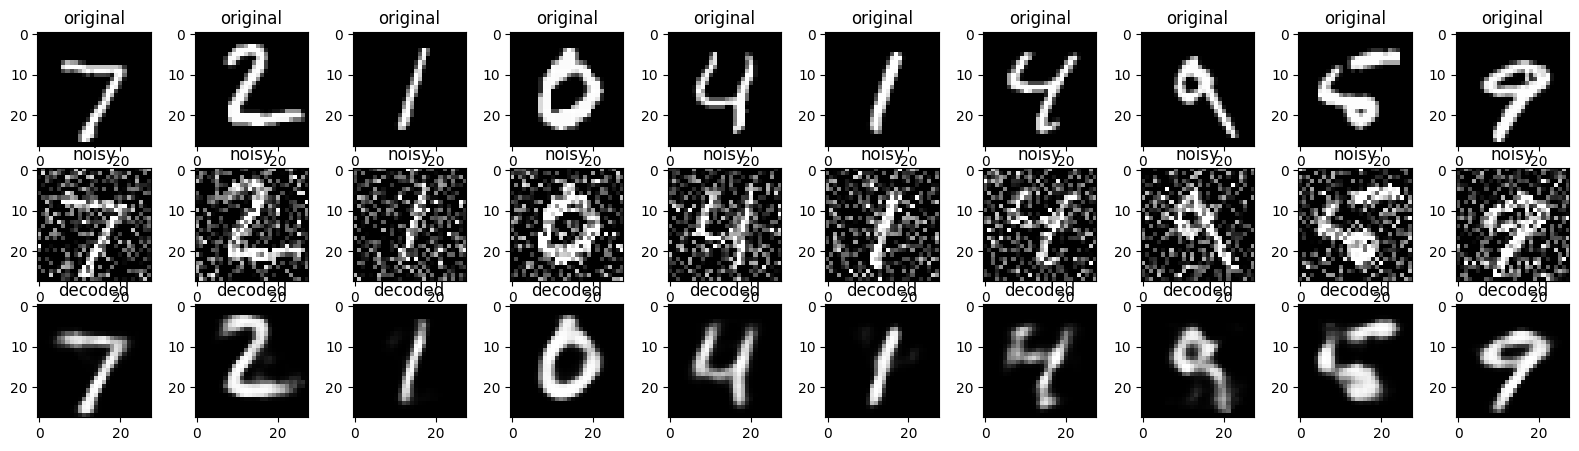

In [31]:
n= 10
plt.figure(figsize=(20,5))
for i in range (n):
  ax = plt.subplot(3,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.title("original")

  ax = plt.subplot(3,n,i+11)
  plt.imshow(x_test_noise[i].reshape(28,28))
  plt.title("noisy")
  plt.gray()

  ax = plt.subplot(3,n,i+21)
  plt.imshow(new_decoded_img[i].reshape(28,28))
  plt.title("decoded")
  plt.gray()